##Graph Coloring
Coloring a node from N color. And choose different color among connected node.

The first term is a constraint for limit one color for one node.
The second term is also a constraint for choosing the different color among connected nodes.

<img src="https://github.com/mdrft/Wildqat/blob/master/examples_ja/img/008_0.png?raw=1">

##Example
Let's think about 6 area to color with 4 color

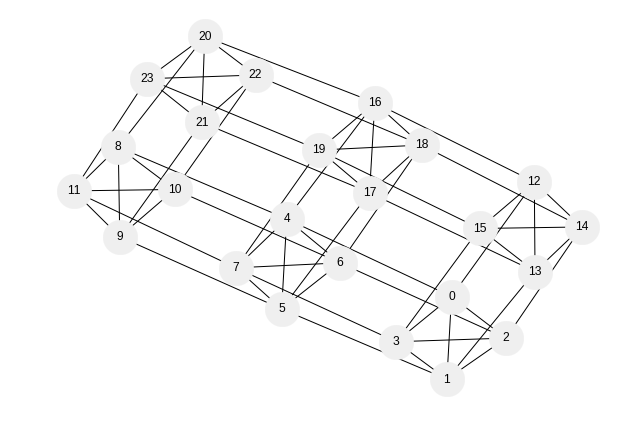

In [0]:
import networkx as nx
import matplotlib.pyplot as plt

options = {'node_color': '#efefef','node_size': 1200,'with_labels':'True'}

G = nx.Graph()
G.add_nodes_from(nx.path_graph(24))
G.add_edges_from([(0,1),(0,2),(0,3),(1,2),(1,3),(2,3) , (4,5),(4,6),(4,7),(5,6),(5,7),(6,7) , (8,9),(8,10),(8,11),(9,10),(9,11),(10,11) , (12,13),(12,14),(12,15),(13,14),(13,15),(14,15) , (16,17),(16,18),(16,19),(17,18),(17,19),(18,19) , (20,21),(20,22),(20,23),(21,22),(21,23),(22,23) , (0,4),(1,5),(2,6),(3,7) , (4,8),(5,9),(6,10),(7,11) , (12,16),(13,17),(14,18),(15,19) , (16,20),(17,21),(18,22),(19,23) , (0,12),(1,13),(2,14),(3,15) , (4,16),(5,17),(6,18),(7,19) , (8,20),(9,21),(10,22),(11,23)])
nx.draw(G, **options)

We have 6groups and each groups has 4 node inside. Make connection between groups just connecting nodes which shows the same color.

##Calculate the 1st term
The fist term is a constraint that each group has just 1qubit selected.
And we need to think all 6 groups.

In [0]:
!pip install blueqat

In [0]:
import blueqat.opt as wq
import numpy as np
a = wq.opt()

First we create 6 groups and put value 1 for bias

In [0]:
group = []

for i in range(6):
  group.append(np.zeros(24))
  for j in range(i*4,i*4+4):
    group[i][j] = 1
print(group)

[array([1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1.])]


Let's try calculate 1-2A+A^2. We can now ignore the constant term and just try calculate -2A+A^2. We use blueqat function to calculate this.

In [0]:
matrix1 = np.zeros((24,24))

for i in range(6):
  matrix1 += -2 * np.diag(group[i]) + wq.sqr(group[i])

print(matrix1)

[[-1.  2.  2.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2.  2.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  2.  2.  2.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2.  2.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.

now we have the 1st matrix and try to check if it works well.

In [0]:
a.qubo = matrix1
b = a.sa()
print(np.asarray(b).reshape((6,4)))

1.6900949478149414
[[0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 0 1]]


To check easily we get the matrix as groups. We can see that every groups has only one qubit selected which meaning select just one color. But now still we have same color among connected groups, next we try to make constraint let connected groups has different color.

##Choose different color among groups
Here we try a blueqat function to automatically create QUBO matrix

In [0]:
Xarr = [[0,4],[1,5],[2,6],[3,7] , [4,8],[5,9],[6,10],[7,11] , [12,16],[13,17],[14,18],[15,19] , [16,20],[17,21],[18,22],[19,23] , [0,12],[1,13],[2,14],[3,15] , [4,16],[5,17],[6,18],[7,19] , [8,20],[9,21],[10,22],[11,23]]
matrix2 = wq.net(Xarr,24)
print(matrix2)

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.

Finally we get the final QUBO matrix by adding these matrix

In [0]:
B  = 1
a.qubo = matrix1 + B*matrix2
b = a.sa()
print(np.asarray(b).reshape((6,4)))

1.7023842334747314
[[0 1 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 1 0 0]
 [1 0 0 0]]


Now we can see that every group colored with different color. The 3rd and 4th group looks the same color but these group are not connected each other.

And we try to check the cost function.

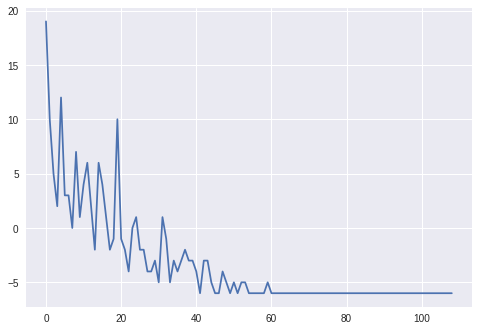

In [0]:
a.plot()


Now we checked the cost function.